# De Scikit a Tensorflow

L'objectiu d'aquest quadern és realitzar la transició entre el Multi-Layer perceptron de Scikit amb el qual vàrem treballar la setmana passada i la llibreria  TensorFlow.

Avui treballarem amb xarxes on totes les neurones de cada capa es troben connectades amb les neurones de la capa següent, tal com està dissenyada la classe MLP de Scikit. 

Començarem usant els mateixos conjunts de dades de la darrera sessió i intentarem reproduïr resultats similars.

In [1]:
# Llibreries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# TensorFlow
import tensorflow as tf
from tensorflow import keras


## Dades


Generació dels conjunts de dades ja coneguts, en aquest cas tendrem conjunts de dades amb 300 mostres.

In [2]:
# Construïm 4 conjunts de dades per classificar:
# En primer lloc un conjunt linealment separable on afegim renou
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=33, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# En segon lloc un que segueix una distribució xor
X_xor = np.random.randn(300, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

# Els afegim a una llista juntament amb els seus noms per tal de poder iterar
# sobre ells
datasets = [
    ("linear", linearly_separable),
    ("moons", make_moons(n_samples=300, noise=0.3, random_state=30)),  # Tercer dataset
    ("circles", make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=30)),  # Darrer dataset
    ("xor", (X_xor, y_xor))]

## Model

Tensorflow ens permet definir l'arquitectura de les xarxes de dues maneres, en aquest cas emprarem l'entorn seqüencial. Deixarem l'entorn funcional per a futures pràctiques. 

Especificam les diferents capes com a part d'un objecte de la classe model.

Les capes que emprarem es diuen denses `Dense` ([enllaç a la documentació](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)). 

Emprarem 2 paràmetres:
 - El nombre de neurones.
 - La funció d'activació.



In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((2)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
# En alguns tutorials veureu la definició de la xarxa així:
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Input((2)))
#model.add(tf.keras.layers.Dense(5, activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


## Compilar el model

El model que em definit necessita ser compilat, en aquesta passa es defineix l'algorisme d'optimització, la funció de pèrdua i les mètriques sobre les quals volem obtenir resultats.

Funcions de pèrdua:
- Documentació [funcions de perdua](https://www.tensorflow.org/api_docs/python/tf/keras/losses?version=nightly)

- Petit [tutorial](https://www.analyticsvidhya.com/blog/2021/05/guide-for-loss-function-in-tensorflow/)

In [5]:
model.compile(optimizer='adam', # també podria ser el descens de gradient tradicional
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# Ens proporciona un resum de com és la nostra xarxa, fixau-vos en el nombre de
# paràmetres
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Entrenament

El procés d'entrenament és molt similar a qualsevol altre mètode d'aprenentatge automàtic. Podem observar 2 diferències:

- Hem d'explicitar el nombre d'èpoques (nombre d'iteracions de l'entrenament).
- Podem aportar un conjunt de dades d'avaluació per tenir una estimació de la bondat del nostre model al final de cada època.

Finalment veureu que la funció fit ens proporciona un diccionari (variable `history`), emprarem les dades guardades en ell per poder dibuixar els gràfics de resum l'entrenament.

In [7]:
# En primer lloc preparam les dades

X, y = datasets[1][1]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [8]:
# En segon lloc entrenam:
# - Proporcionam les dades d'entrenament i de validació
# - Definim el nombre d'iteracions
# - Es pot definir el tamany del batch (batch_size)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 1s 31ms/step - loss: 0.7232 - accuracy: 0.5619 - val_loss: 0.7113 - val_accuracy: 0.6000
Epoch 2/30
7/7 [==============================] - 0s 6ms/step - loss: 0.7190 - accuracy: 0.5714 - val_loss: 0.7073 - val_accuracy: 0.6111
Epoch 3/30
7/7 [==============================] - 0s 5ms/step - loss: 0.7146 - accuracy: 0.5762 - val_loss: 0.7037 - val_accuracy: 0.6111
Epoch 4/30
7/7 [==============================] - 0s 5ms/step - loss: 0.7105 - accuracy: 0.5762 - val_loss: 0.7002 - val_accuracy: 0.6000
Epoch 5/30
7/7 [==============================] - 0s 6ms/step - loss: 0.7067 - accuracy: 0.5810 - val_loss: 0.6968 - val_accuracy: 0.6000
Epoch 6/30
7/7 [==============================] - 0s 5ms/step - loss: 0.7028 - accuracy: 0.5857 - val_loss: 0.6936 - val_accuracy: 0.6000
Epoch 7/30
7/7 [==============================] - 0s 6ms/step - loss: 0.6994 - accuracy: 0.5905 - val_loss: 0.6905 - val_accuracy: 0.5889
Epoch 8/30
7/7 [============================

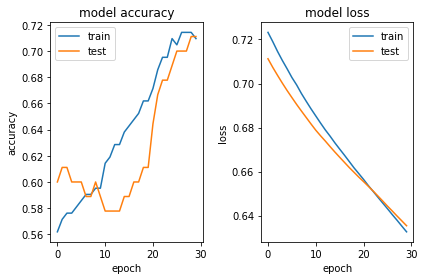

In [9]:
# (history.history.keys())

# Mostram els resultats de l'entrenament de manera gràfica
figure, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])

ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
#ax[0].set_ylim(0,1)
ax[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
#ax[1].set_ylim(0,1)
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper right')
figure.tight_layout()
plt.show()

## Predicció

In [10]:
result = model.predict(X)
clf_result = np.copy(result)

clf_result[clf_result < 0.5] = 0
clf_result[clf_result >= 0.5] = 1

print(result)

[[0.4657627 ]
 [0.4897735 ]
 [0.4693722 ]
 [0.4647717 ]
 [0.59531283]
 [0.4647717 ]
 [0.526408  ]
 [0.46888447]
 [0.608244  ]
 [0.72217953]
 [0.4647717 ]
 [0.48067772]
 [0.4647717 ]
 [0.80592   ]
 [0.67305094]
 [0.4647717 ]
 [0.6552469 ]
 [0.4647717 ]
 [0.5745568 ]
 [0.8162005 ]
 [0.73211884]
 [0.6108599 ]
 [0.6419237 ]
 [0.4832667 ]
 [0.4653    ]
 [0.4835499 ]
 [0.4647717 ]
 [0.5455084 ]
 [0.72814137]
 [0.4647717 ]
 [0.4817552 ]
 [0.4647717 ]
 [0.5091377 ]
 [0.46788865]
 [0.7126322 ]
 [0.477092  ]
 [0.7435995 ]
 [0.46706828]
 [0.48210114]
 [0.48048097]
 [0.485653  ]
 [0.48526472]
 [0.4647717 ]
 [0.4708103 ]
 [0.66049504]
 [0.4647717 ]
 [0.48598754]
 [0.48009714]
 [0.67151076]
 [0.7197061 ]
 [0.4647717 ]
 [0.7497126 ]
 [0.68770903]
 [0.4677979 ]
 [0.5797122 ]
 [0.46950707]
 [0.59692866]
 [0.4647717 ]
 [0.708519  ]
 [0.4647717 ]
 [0.46579245]
 [0.4647717 ]
 [0.512929  ]
 [0.47072718]
 [0.46544042]
 [0.53223014]
 [0.69990647]
 [0.6398239 ]
 [0.4647717 ]
 [0.48114336]
 [0.47953147]
 [0.48

AUC score:	 0.8050444444444445


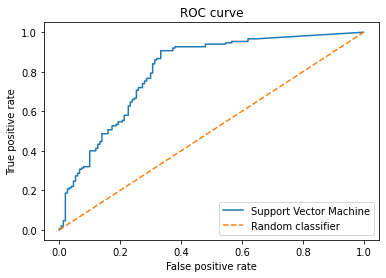

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

fpr, tpr, _ = roc_curve(y, result)
auc = roc_auc_score(y, result)
print("AUC score:\t", auc)
plt.plot(fpr, tpr, label="Support Vector Machine")
plt.plot([0, 1], [0, 1], label="Random classifier", linestyle="--")
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()